Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [87]:
# !pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [88]:
# !pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0.1)
Note: you may need to restart the kernel to use updated packages.


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

from scipy import stats as st

%matplotlib inline

In [90]:
df = pd.read_csv('/datasets/games.csv')

In [91]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9823,Earthworm Jim 3D,N64,1999.0,Platform,0.10,0.02,0.00,0.00,NaN,NaN,NaN
3473,Rayman Legends,PS3,2013.0,Platform,0.14,0.34,0.00,0.10,91.0,8.7,E10+
4617,Cabela's Legendary Adventures,PS2,2008.0,Sports,0.21,0.16,0.00,0.05,NaN,tbd,T
7919,Crash & Spyro Superpack,GBA,2005.0,Platform,0.13,0.05,0.00,0.00,NaN,NaN,NaN
8322,Bomberman 64: The Second Attack!,N64,1999.0,Adventure,0.05,0.01,0.11,0.00,NaN,NaN,NaN


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Визуализация пропусков

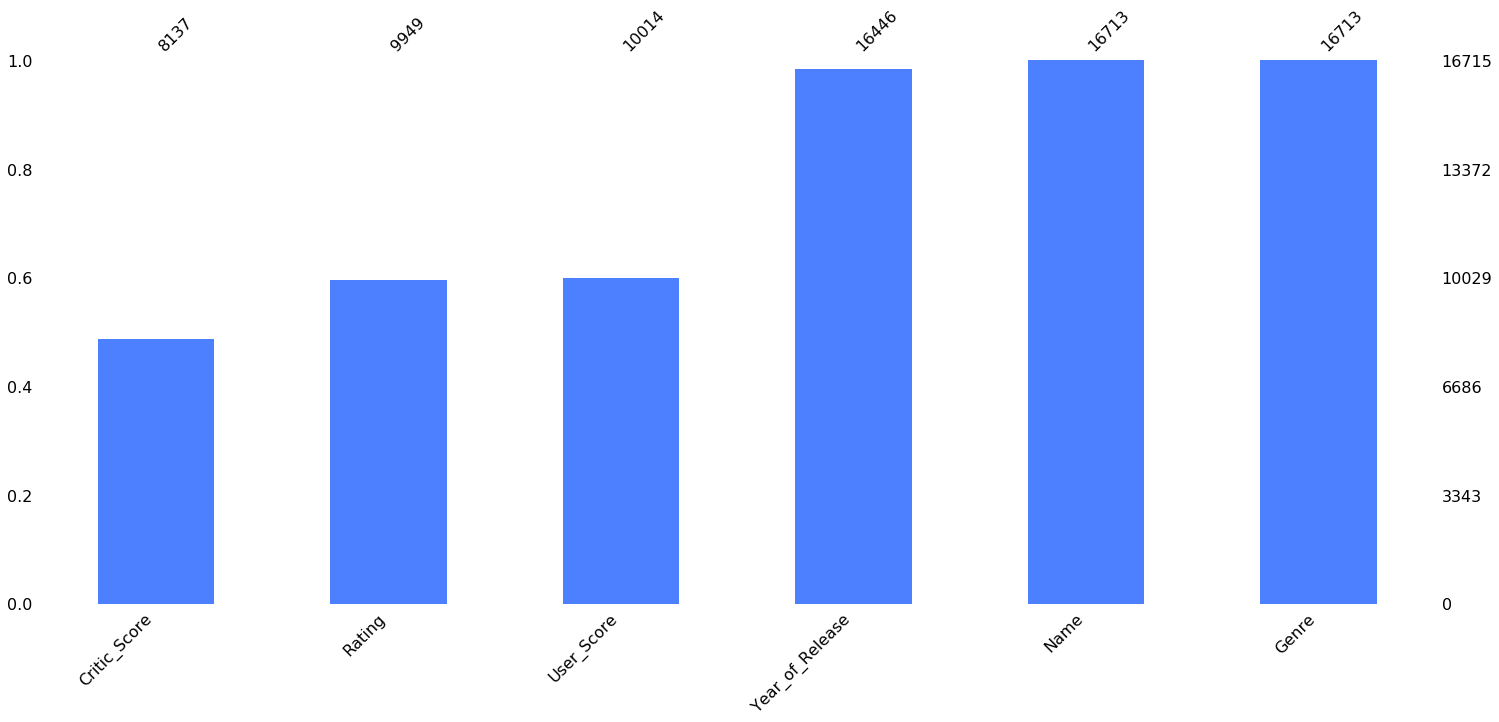

In [93]:
msno.bar(
    df[['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']], 
    labels=True, 
    color=(0.3, 0.5, 1), 
    sort='ascending'
)

Посмотрим зависимость пропусков друг от друга

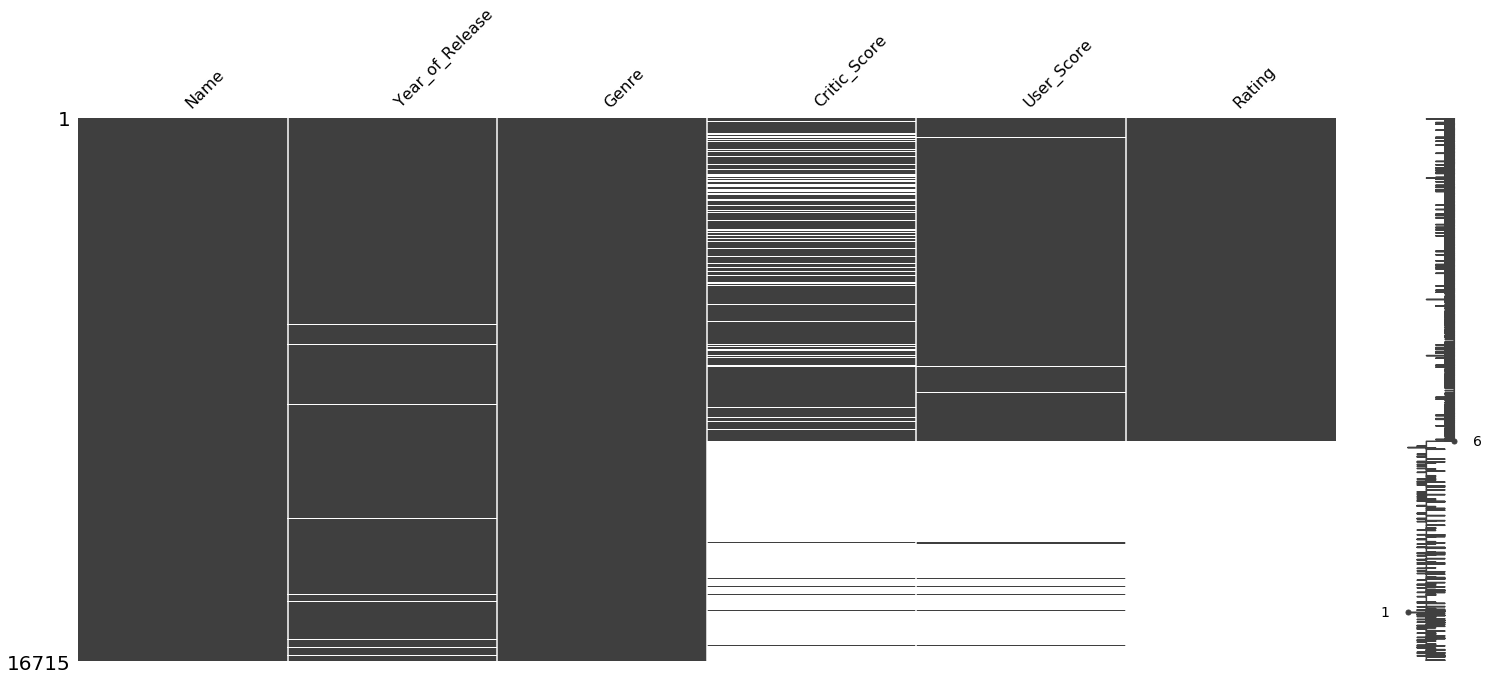

In [94]:
msno.matrix(df[['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']].sort_values('Rating'))

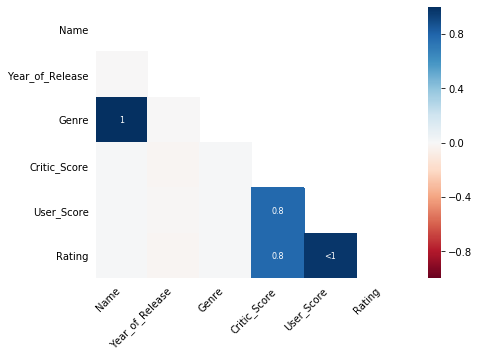

In [95]:
msno.heatmap(
    df[['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']], 
    figsize=(7, 5),
    fontsize=10
)
plt.show()

### Описательные статистики

In [96]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- Вывели первые 5 произвольных записей, нашли, что у нас 16715 записей. 
- Визуализировали пропуски и увидели корреляцию между Genre и Name, где пропуск в Genre, там пропуск и в Name. Тоже самое можно сказать про Rating и Critic_Score c User_Score. 
- Оценили числовые фичи: Во всех видах sales у нас среднее превышает медиану, что говорит о больших числах справа на графике распределения этих величин.

## Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [97]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработайте пропуски при необходимости

In [98]:
df.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [99]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Не вижу ничего плохого, если нет имени игры, другое дело, что тут много пропусков, нет жанра, тогда в статистику по жанрам и годам не попадет, да и сильной погоды врядли сделает. У этих записей как и многих других не заполнен user_score и rating. Удаляем. Заодно и с genre разобрались.

In [100]:
# df.dropna(subset=['name'], inplace=True)
df = df.dropna(subset=['name'])
df.reset_index(drop=True)
len(df[df['name'].isna()])

0

In [101]:
df[df['user_score'].isna()].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2627,Battle Stations,PS,1997.0,Strategy,0.43,0.29,0.00,0.05,NaN,NaN,NaN
8959,Turbo Prop Racing,PS,1997.0,Racing,0.08,0.06,0.00,0.01,NaN,NaN,NaN
11998,Shin Chan Contra ¡Los Plastas!,DS,2009.0,Platform,0.00,0.00,0.07,0.00,NaN,NaN,NaN


In [102]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

DEFINITION: “TBA” and “TBD” mean “to be announced” and “to be determined,” respectively. These terms are used broadly in event planning; they indicate that although something is expected to happen, a particular aspect of that, such as place and time, remains to be confirmed.

Что значит что будет еще озвучено или определено. В моем случае это значит, что рейтинга на данный момент нет. Так как рейтинг я планирую все же восстановить, то скинем для tbd это значение до NaN

In [103]:
# df['user_score'] = df['user_score'].apply(lambda x: np.NaN if x == 'tbd' else x)
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [104]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [105]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [106]:
df[['user_score', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].tail(5)

,user_score,year_of_release,na_sales,eu_sales,jp_sales,other_sales
16710,NaN,2016.0,0.00,0.00,0.01,0.0
16711,NaN,2006.0,0.00,0.01,0.00,0.0
16712,NaN,2016.0,0.00,0.00,0.01,0.0
16713,NaN,2003.0,0.01,0.00,0.00,0.0
16714,NaN,2016.0,0.00,0.00,0.01,0.0


In [107]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=7, weights='distance')
df[['user_score', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']] = \
    knn_imputer.fit_transform(df[['user_score', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']])
df[['user_score', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']].tail(5)

,user_score,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
16710,7.500000,2016.0,0.00,0.00,0.01,0.0,69.000000
16711,7.257143,2006.0,0.00,0.01,0.00,0.0,63.714286
16712,7.500000,2016.0,0.00,0.00,0.01,0.0,69.000000
16713,4.642857,2003.0,0.01,0.00,0.00,0.0,55.857143
16714,7.500000,2016.0,0.00,0.00,0.01,0.0,69.000000


Теперь немного поясним что тут происходит. Итак у нас было ооочень много пропусков для user_score. Понятно что взять его кроме как возможно из интернета нельзя. И тут на помощь нам приходит класс KNNImputer, он помогает нам заполнить пропуски способом, несколько более сложным чем среднее. Класс KNNImputer работает по аналогии с алгоритмом KNN - то есть для искомых наблюдений пытается определить класс или значение по аналогии с теми, что оказались рядом. Число обычно берется нечетное, что бы не было ситуаций когда алгоритм встретил 2 равновестных соседа, также мы задаем некий вес решения, который будет отталкиваться от дистанции - weights. Это значит что если у нас "соседов" класса А будет 4 против 3 класса Б, но расстояния до этих 3 значительно меньше, то алгоритм предпочтет класс Б.

Для метода класса fit_transform не такое богатое описание Docstring: Fit to data, then transform it. Но понятно что именно он и делает эту "магию".

In [108]:
df.sample(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11713,Need For Speed: Undercover,PC,2008.0,Racing,0.00,0.07,0.00,0.01,65.0,4.9,T
10450,Banjo-Pilot,GBA,2005.0,Racing,0.07,0.03,0.00,0.00,68.0,5.9,E
2619,Tom Clancy's Splinter Cell: Double Agent,X360,2006.0,Action,0.67,0.04,0.01,0.06,85.0,8.1,M
3061,NHL 13,X360,2012.0,Sports,0.51,0.10,0.00,0.05,83.0,6.6,E10+


In [109]:
df['user_score'] = df['user_score'].apply(lambda x: round(x, 1))

In [110]:
df['critic_score'] = df['critic_score'].apply(lambda x: round(x, 0))

In [ ]:
df['critic_score'].round(0)

In [111]:
df.sample(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10331,BlazBlue: Continuum Shift II,3DS,2011.0,Fighting,0.05,0.01,0.04,0.01,64.0,6.1,T
4053,One Piece: Grand Battle!,PS,2001.0,Fighting,0.00,0.00,0.46,0.03,77.0,8.3,NaN
16569,The Eye of Judgment: Legends,PSP,2010.0,Strategy,0.00,0.00,0.01,0.00,69.0,7.9,E10+
6997,Rocket Power: Beach Bandits,GC,2002.0,Platform,0.18,0.05,0.00,0.01,53.0,6.5,E


In [112]:
df.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [113]:
df[~df['rating'].isna()].sort_values(by=['critic_score', 'user_score'], ascending=False).tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1050,Deal or No Deal,DS,2007.0,Misc,1.15,0.40,0.0,0.15,20.0,1.9,E
11442,Ninjabread Man,Wii,2007.0,Action,0.07,0.00,0.0,0.01,20.0,1.7,E
7218,Nickelodeon Party Blast,XB,2002.0,Misc,0.16,0.05,0.0,0.01,19.0,4.3,E
10015,Rugby 15,PS4,2015.0,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E
9105,Chicken Shoot,DS,2007.0,Action,0.13,0.00,0.0,0.01,19.0,3.1,E10+
15343,Balls of Fury,Wii,2007.0,Sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+
12131,Anubis II,Wii,2007.0,Platform,0.06,0.00,0.0,0.00,19.0,2.7,E
12822,Ride to Hell,X360,2013.0,Racing,0.04,0.01,0.0,0.01,19.0,1.3,M
10662,Leisure Suit Larry: Box Office Bust,PS3,2009.0,Adventure,0.06,0.03,0.0,0.01,17.0,1.7,M
13689,Ride to Hell,PS3,2013.0,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M


In [114]:
t = df[~df['rating'].isna()].groupby('rating')['critic_score', 'user_score'].median()\
    .reset_index()\
    .sort_values(
    by='critic_score', 
    ascending=False,
).reset_index(drop=True)
t

,rating,critic_score,user_score
0,AO,93.0,8.60
1,K-A,80.0,8.10
2,M,74.0,7.50
3,T,70.0,7.50
4,E,67.0,7.00
5,E10+,66.0,7.00
6,EC,65.5,6.85
7,RP,63.0,5.70


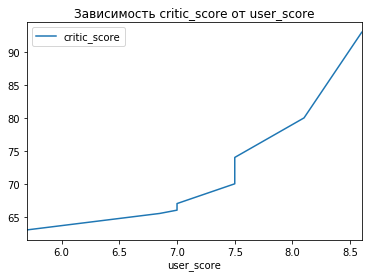

In [115]:
t.plot(x='user_score', y='critic_score', title='Зависимость critic_score от user_score', legend=True)
plt.show()

Тамким образом мы наглядно видим зависимость critic_score и user_score сгруппированные по rating

In [116]:
for index, row in df.iterrows():
    if type(row['rating']) in [float]:
        if row['critic_score'] < 64.25 and row['user_score'] < 6.275:
            df.loc[index, 'rating'] = 'RP'
        elif (64.25 <= row['critic_score'] < 65.75) and (6.275 <= row['user_score'] < 6.925):
            df.loc[index, 'rating'] = 'EC'
        elif (65.75 <= row['critic_score'] < 66.5) and (6.925 <= row['user_score'] < 7.0):
            df.loc[index, 'rating'] = 'E10+'
        elif (66.5 <= row['critic_score'] < 68.5) and (7.0 <= row['user_score'] < 7.0):
            df.loc[index, 'rating'] = 'E'
        elif (68.5 <= row['critic_score'] < 72) and (7.0 <= row['user_score'] < 7.25):
            df.loc[index, 'rating'] = 'T'
        elif (72 <= row['critic_score'] < 77) and (7.25 <= row['user_score'] < 7.8):
            df.loc[index, 'rating'] = 'M'
        elif (77 <= row['critic_score'] < 86.5) and (7.8 <= row['user_score'] < 8.35):
            df.loc[index, 'rating'] = 'K-A'
        elif (86.5 <= row['critic_score']) and (8.35 <= row['user_score']):
            df.loc[index, 'rating'] = 'AO'

Первый проход для точности, второй для тех кому не повезло попасть в первую группу

In [117]:
for index, row in df.iterrows():
    if type(row['rating']) in [float]:
        if row['critic_score'] < 64.25:
            df.loc[index, 'rating'] = 'RP'
        elif (64.25 <= row['critic_score'] < 65.75):
            df.loc[index, 'rating'] = 'EC'
        elif (65.75 <= row['critic_score'] < 66.5):
            df.loc[index, 'rating'] = 'E10+'
        elif (66.5 <= row['critic_score'] < 68.5):
            df.loc[index, 'rating'] = 'E'
        elif (68.5 <= row['critic_score'] < 72):
            df.loc[index, 'rating'] = 'T'
        elif (72 <= row['critic_score'] < 77):
            df.loc[index, 'rating'] = 'M'
        elif (77 <= row['critic_score'] < 86.5):
            df.loc[index, 'rating'] = 'K-A'
        elif (86.5 <= row['critic_score']):
            df.loc[index, 'rating'] = 'AO'

In [118]:
df['rating'].unique()

array(['E', 'AO', 'K-A', 'M', 'T', 'E10+', 'RP', 'EC'], dtype=object)

In [119]:
df['year_of_release'] = df['year_of_release'].apply(lambda x: round(x, 0))

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [120]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :", start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            try:
                result = (props[col] - asint)
                result = result.sum()
                if result > -0.01 and result < 0.01:
                    IsInt = True

                # Make Integer/unsigned Integer datatypes
                if IsInt:
                    if mn >= 0:
                        if mx < 255:
                            props[col] = props[col].astype(np.uint8)
                        elif mx < 65535:
                            props[col] = props[col].astype(np.uint16)
                        elif mx < 4294967295:
                            props[col] = props[col].astype(np.uint32)
                        else:
                            props[col] = props[col].astype(np.uint64)
                    else:
                        if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                            props[col] = props[col].astype(np.int8)
                        elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                            props[col] = props[col].astype(np.int16)
                        elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                            props[col] = props[col].astype(np.int32)
                        elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                            props[col] = props[col].astype(np.int64)    

                # Make float datatypes 32 bit
                else:
                    props[col] = props[col].astype(np.float32)

                # Print new column type
                print("dtype after: ",props[col].dtype)
                print("******************************")
            except TypeError:
                pass
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist
df, NAlist = reduce_mem_usage(df)

Memory usage of properties dataframe is : 2.155120849609375  MB
******************************
Column:  year_of_release
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  na_sales
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  eu_sales
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  jp_sales
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  other_sales
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  critic_score
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  user_score
dtype before:  float64
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usag

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null uint16
genre              16713 non-null object
na_sales           16713 non-null float32
eu_sales           16713 non-null float32
jp_sales           16713 non-null float32
other_sales        16713 non-null float32
critic_score       16713 non-null uint8
user_score         16713 non-null float32
rating             16713 non-null object
dtypes: float32(5), object(4), uint16(1), uint8(1)
memory usage: 1.6+ MB


In [122]:
df.sample(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4563,"Barbie: Jet, Set & Style!",DS,2011,Misc,0.34,0.05,0.0,0.03,67,7.1,E
5691,Heart of Darkness,PS,1998,Platform,0.18,0.12,0.0,0.02,67,7.8,E


### Проверим наличие явных дубликатов

In [123]:
df.duplicated().sum()

0

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [124]:
def sum_sales_count(df):
    df['sum_sales'] = 0
    for index, row in df.iterrows():
        df.loc[index, 'sum_sales'] = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

In [125]:
sum_sales_count(df)

In [126]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1439,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.00,0.12,84,6.2,M,1.34
8692,Sherlock Holmes vs. Jack the Ripper,X360,2009,Adventure,0.11,0.03,0.00,0.01,62,6.8,T,0.15
8468,Chuck E. Cheese's Party Games,Wii,2010,Misc,0.15,0.00,0.00,0.01,46,3.6,E,0.16
14240,Rapala Tournament Fishing!,X360,2006,Sports,0.03,0.00,0.00,0.00,41,8.0,E,0.03
14279,Gaia Saver Hero Saidai no Sakusen,SNES,1994,Role-Playing,0.00,0.00,0.03,0.00,54,5.6,RP,0.03


- Столбцы привели к питоновскому стилю
- Было memory usage: 1.4+ MB, стало memory usage: 963.2+ KB
- Численные пропуски обработали с помощью KNNImputer, категориальные подобрали по числовым значениям, предварительно выявив закономерность
- Прверили наличие дубликатов, их нет

## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

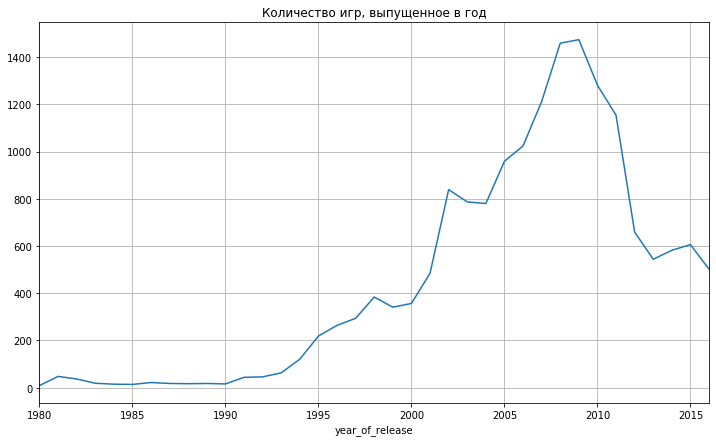

In [127]:
df.groupby('year_of_release')['name'].agg('count').plot(
    title='Количество игр, выпущенное в год', figsize=(12, 7), grid=True,
)
plt.show()

На графике наглядно видно, сколько игр выпускалось в разные годы, пока данные точно не лишние

### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [128]:
t = df.groupby('platform')[['sum_sales']].agg('sum').reset_index().sort_values('sum_sales', ascending=False).head(10)
pl_10_list = list(t['platform'])
t

,platform,sum_sales
16,PS2,1255.769998
28,X360,971.419999
17,PS3,939.649999
26,Wii,907.509998
4,DS,806.119999
15,PS,730.859999
6,GBA,317.850000
18,PS4,314.140000
19,PSP,294.050000
13,PC,259.519999


In [129]:
t2 = df.query('platform in @pl_10_list').sort_values('year_of_release')
t2.sort_values('sum_sales').tail(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,8.0,E,32.770000
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,8.3,E,35.520000
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539999


In [130]:
year_of_release = list(sorted(t2['year_of_release'].unique()))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


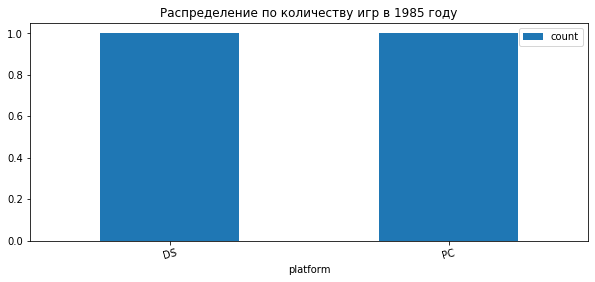

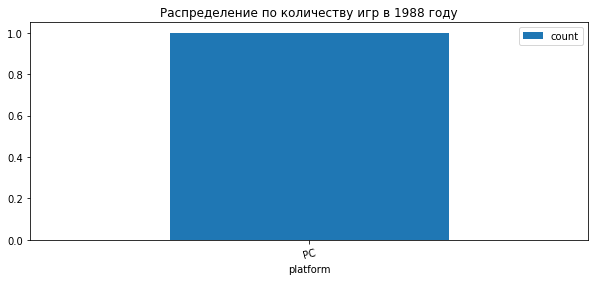

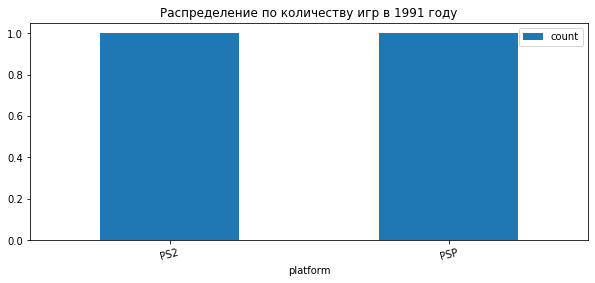

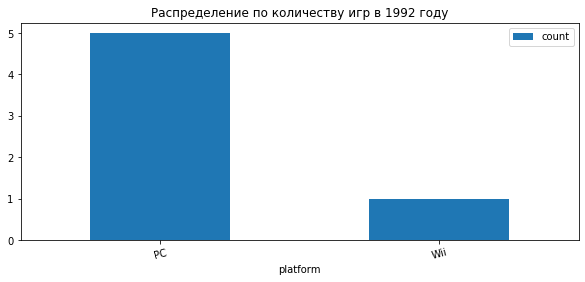

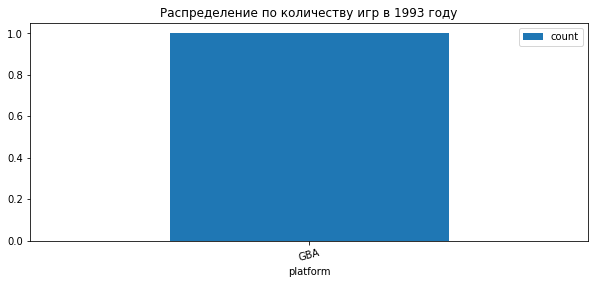

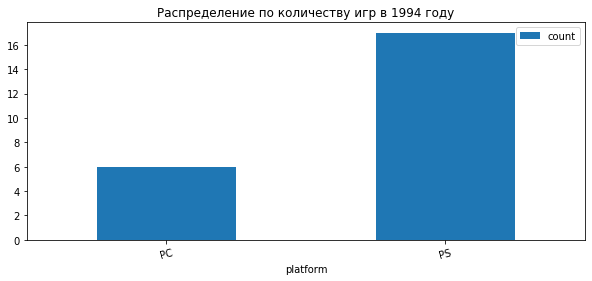

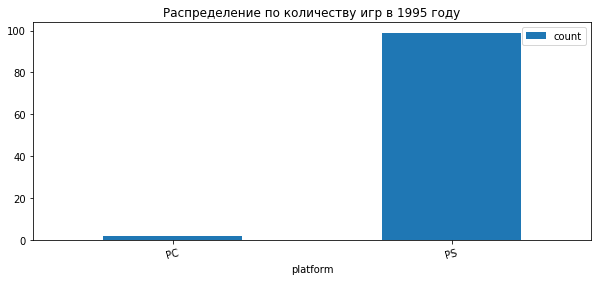

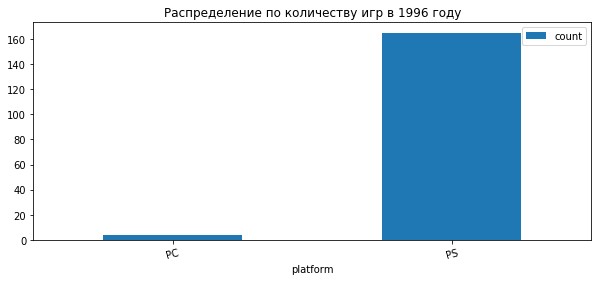

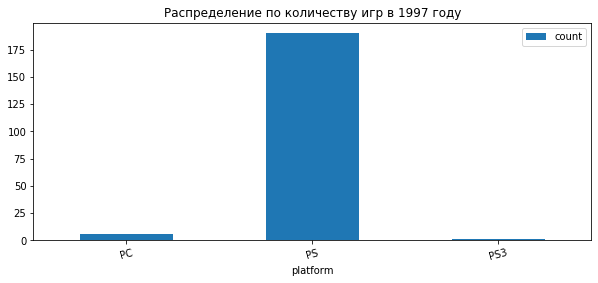

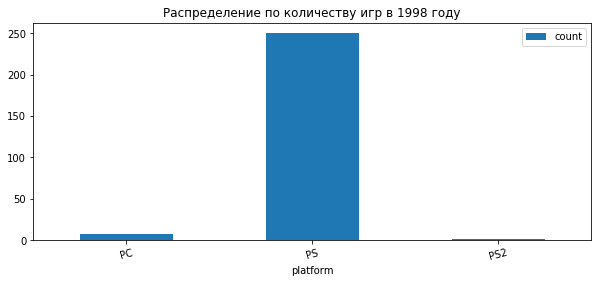

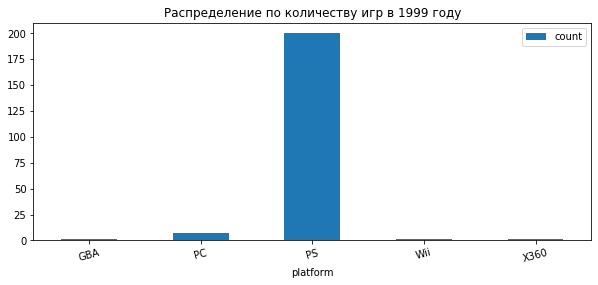

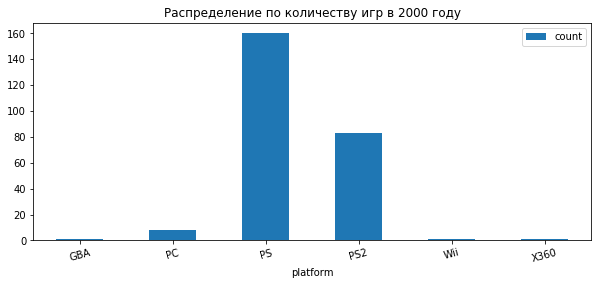

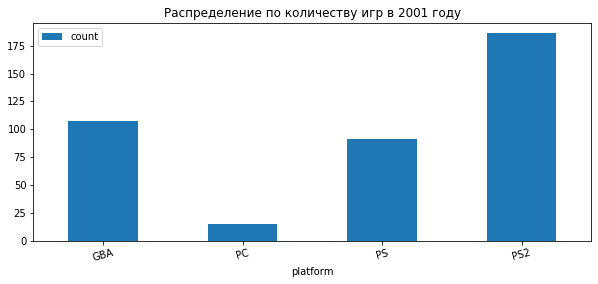

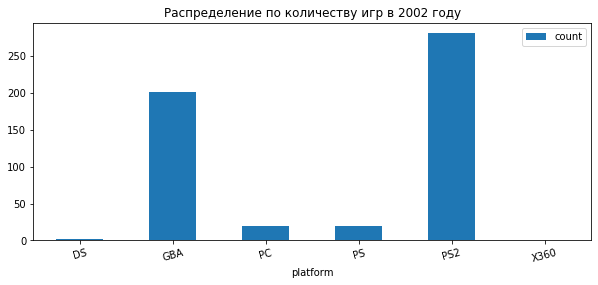

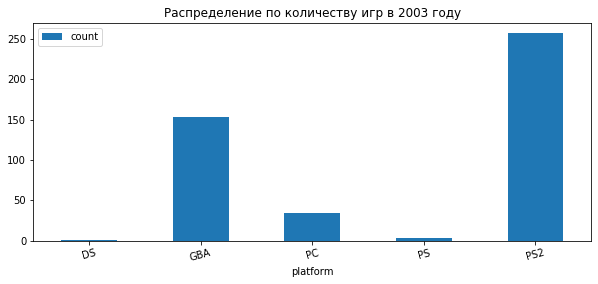

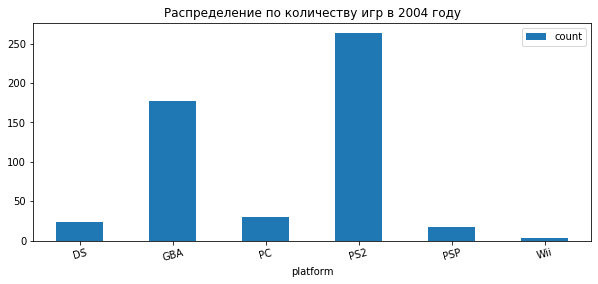

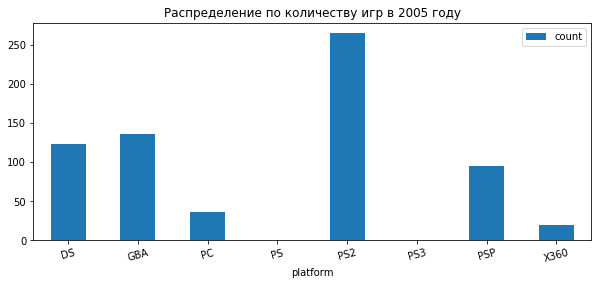

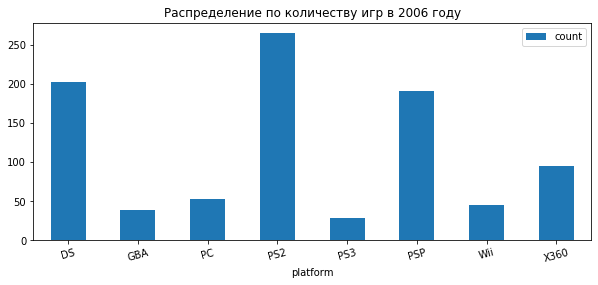

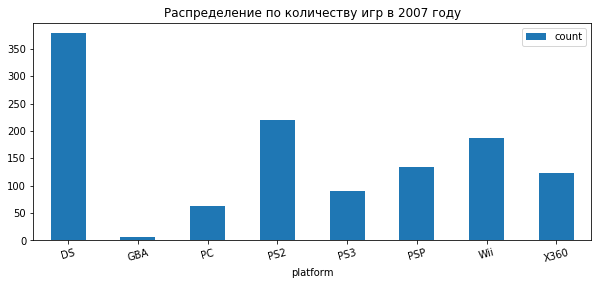

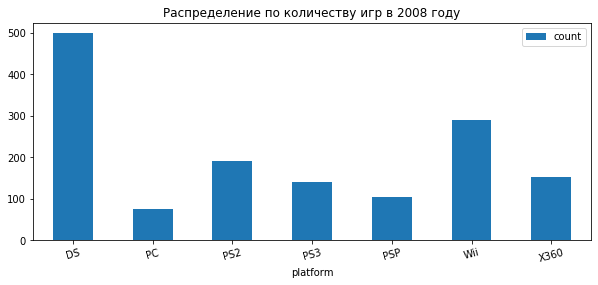

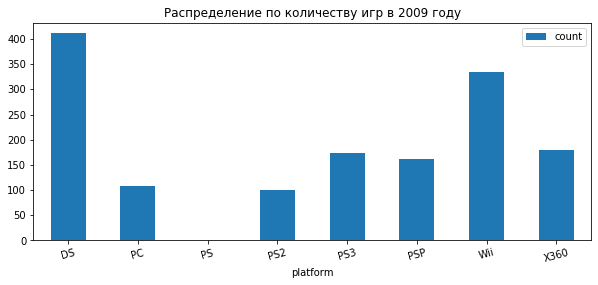

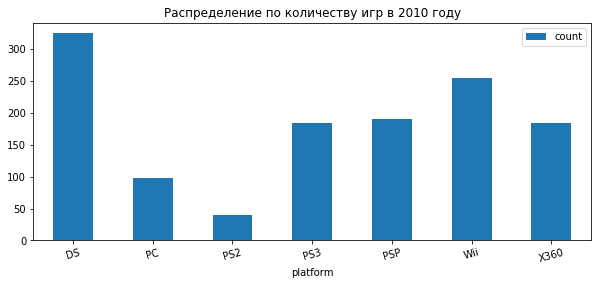

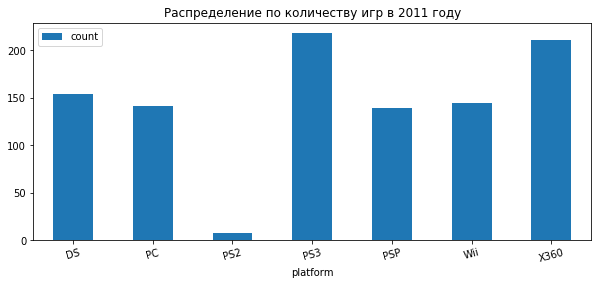

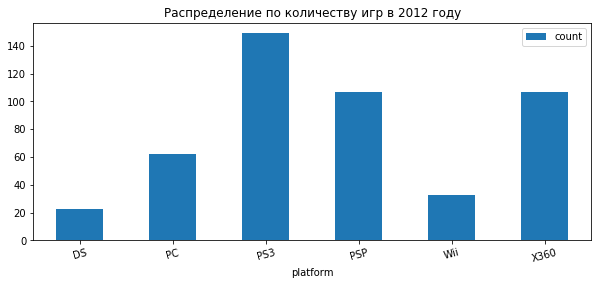

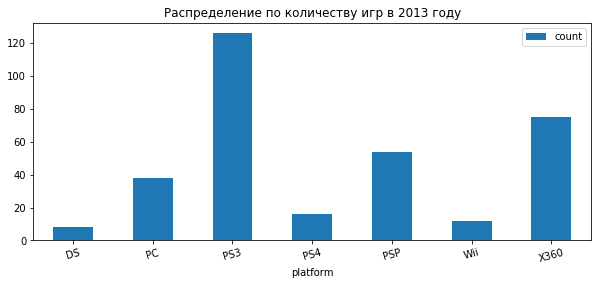

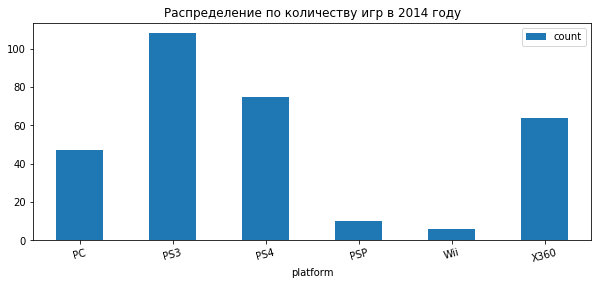

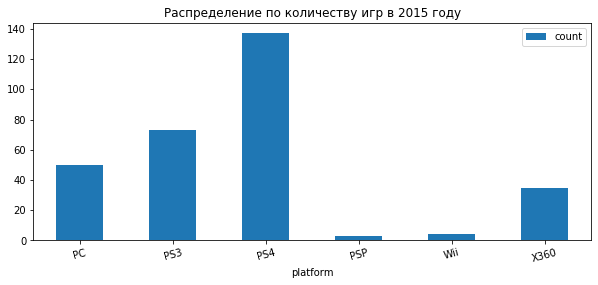

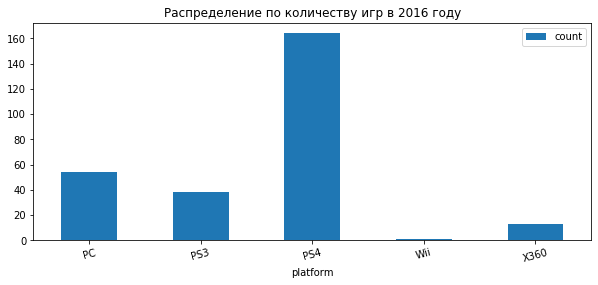

In [131]:
for year in year_of_release:
    t3 = t2.query('year_of_release == @year').groupby([df["platform"]])['platform'].agg('count').to_frame()
    t3.columns = ['count']
    t3.reset_index().plot.bar(
        x='platform', y='count', rot=15, title=f'Распределение по количеству игр в {year} году', figsize=(10, 4)
    )

- По распределению по годам видно, что появились игры для PC и DS, затем в 1994 году стало стремительно расти количество игр для PS, их появилось больше 16, в 1995 их уже было около 100, при этом для PC меньше 5, других  платформ в тот год не было. 
- Вплоть до 1999 PS уверенно отрывалось от других платформ по количеству и достигало 200 игр в год. 
- В 2000 году происходит перелом и PS2 начинает набирать обороты с 80 играми в год против 160 для PS.
- C 2001 по количеству игр в год лидирует PS2 c около 180 играми в год, за ним GBA со 100+ играми, и PS c 90 играми.
- Долгое время PS2 и GBA примерно одинаково держат дистанцию друг с другом и находятся в отрыве от других, и в 2005 появляются DS и PSP которые догоняют GBA по количеству - 125 и 90 против 170 соответственно. PS2 по прежнему лидер в 2005 с более чем 250 играми в год.
- В 2006 перелом, DS и PSP опережают GBA, начинают догонять PS2, появляется X360 с заявкой на успех с почти 100 играми.
- В 2007 лидерство берет DS, у него рекордные 370 игр в год, PS2 держатся около 250 в год второй год подряд
- В 2011 году DS теряет лидерство - 150 игр в год, в перед выходит PS3, появившаяся в 2005 году, с 200+ игр в год, рядом с ней X360 с 200 играми в год.
- PS3 держит лидерство 4 года и в 2015 году в лидерство выбивается PS4 с 140 играми в год. На 2016 год она еще в топе с 160+ играми в год.
- Таким образом можно говорить о минимуме в 7 лет для платформы которая была в топе по количеству игр, и около 12 лет в целом от старта до финиша.

In [132]:
for year in range(1998, 2017, 1):
    t3 = t2.query('year_of_release == @year').groupby([df["platform"]])['platform'].agg('count').to_frame()
    t3.columns = ['count']
    platform = t3.reset_index().sort_values('count', ascending=False).head(1).iloc[0, 0]
    print(f"В {year} году в топе продаж была платформа {platform}")

В 1998 году в топе продаж была платформа PS
В 1999 году в топе продаж была платформа PS
В 2000 году в топе продаж была платформа PS
В 2001 году в топе продаж была платформа PS2
В 2002 году в топе продаж была платформа PS2
В 2003 году в топе продаж была платформа PS2
В 2004 году в топе продаж была платформа PS2
В 2005 году в топе продаж была платформа PS2
В 2006 году в топе продаж была платформа PS2
В 2007 году в топе продаж была платформа DS
В 2008 году в топе продаж была платформа DS
В 2009 году в топе продаж была платформа DS
В 2010 году в топе продаж была платформа DS
В 2011 году в топе продаж была платформа PS3
В 2012 году в топе продаж была платформа PS3
В 2013 году в топе продаж была платформа PS3
В 2014 году в топе продаж была платформа PS3
В 2015 году в топе продаж была платформа PS4
В 2016 году в топе продаж была платформа PS4


- Таким образом самыми прибыльными платформами были PS, PS2, DS, PS3, PS4.
- Учитывая что они все до PS4 держались в топе не менее 3 лет можно сделать предположение, что в 2017 году была в топе также PS4.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

In [133]:
platforms = list(df.groupby('platform')['sum_sales'].agg('sum').to_frame().reset_index().sort_values('sum_sales')['platform'])

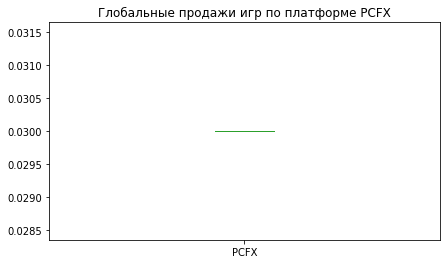

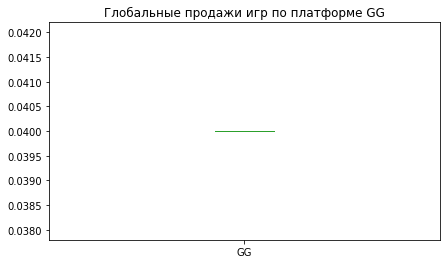

In [134]:
for platform in ['PCFX', 'GG',]:
    t = df.query("platform == @platform")[['platform', 'sum_sales']]
    pd.DataFrame(np.array(t['sum_sales']), columns=[platform]).plot(
        kind='box', figsize=(7, 4), title=f'Глобальные продажи игр по платформе {platform}',
    )

- Графики специально были отсортированы по sum_sales в каждой группе платформ
- Там где наблюдений мало, по сути наверно только одно(PCFX и GG) - ящик даже не получился, показалась только медиана

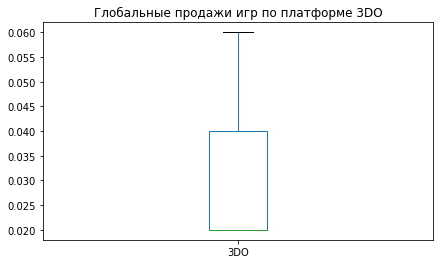

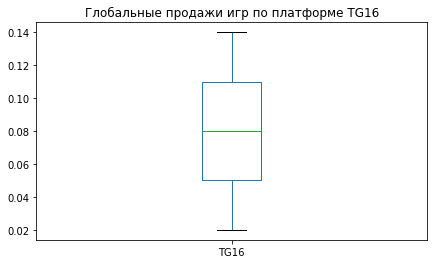

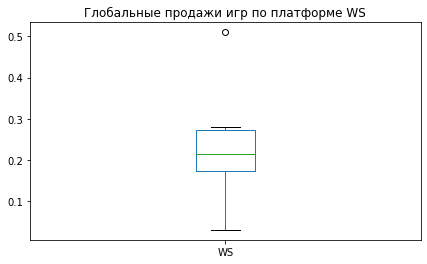

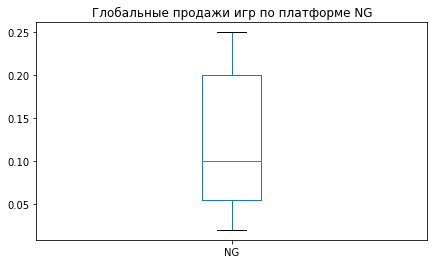

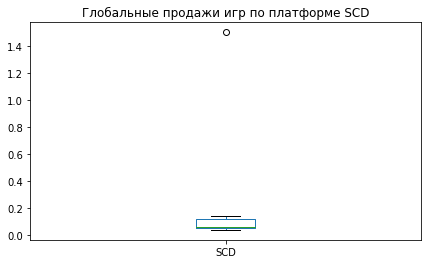

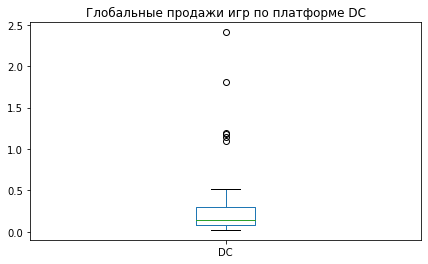

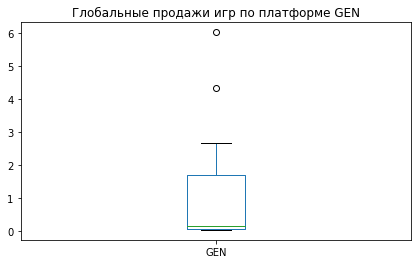

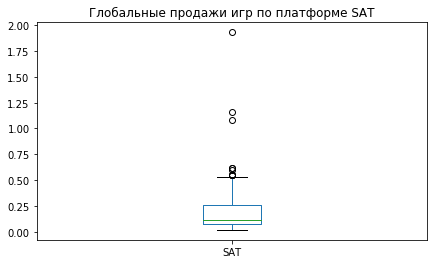

In [135]:
for platform in ['3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT']:
    t = df.query("platform == @platform")[['platform', 'sum_sales']]
    pd.DataFrame(np.array(t['sum_sales']), columns=[platform]).plot(
        kind='box', figsize=(7, 4), title=f'Глобальные продажи игр по платформе {platform}',
    )

- Для платформ, где наблюдений еще пока не много получились весьма красивые ящики:
    - Например для TG16 у нас виден минимум в 0.02, максимум в 0.14, медиана 0.08 и первый и третий квартили, которые показывают где располагается основаная масса наблюдений - между 0.05 и 0.11. Отдельно, вынесенных за пределы ящика, точек нет, по этому как бы и выбросов нет.
    - А вот для платформы WS у нас есть нетипичный выброс в 0.5, при том что медиана у нас на уровне примерно 0.2+. Здесь же минимум указан как примерно 0, а максимум не доходит до 3.
    - Еще можно оценить ящик для SCD - он в общем-то симметричный, что говорит о достаточно гладком распределении, хотя медиана склоняется к низу, но есть выброс в 1.4+.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


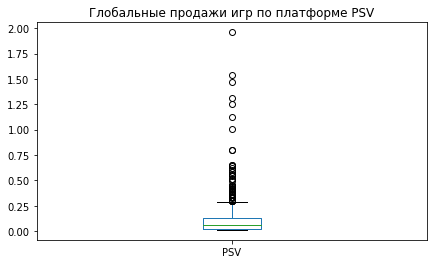

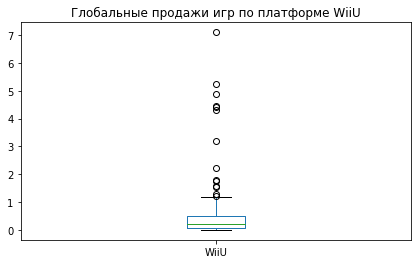

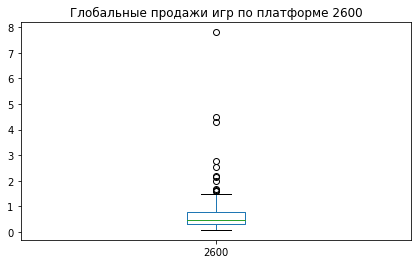

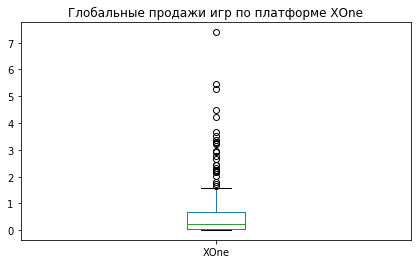

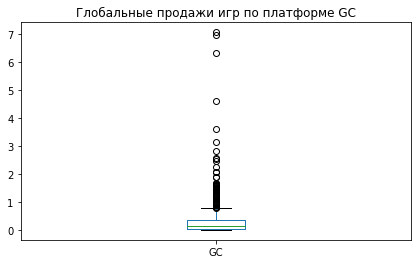

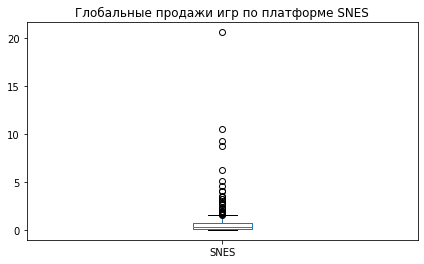

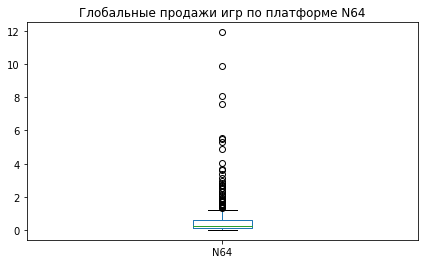

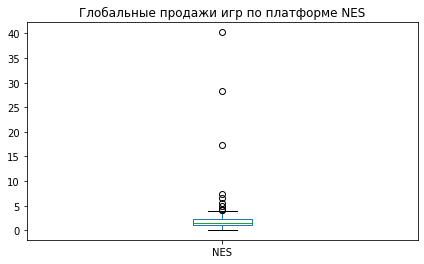

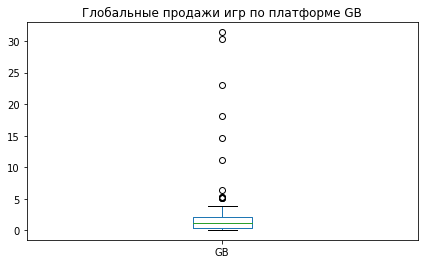

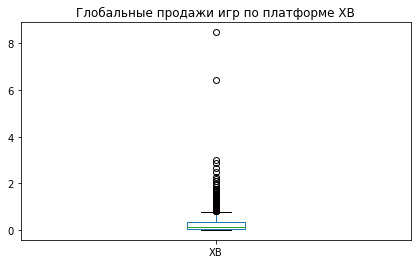

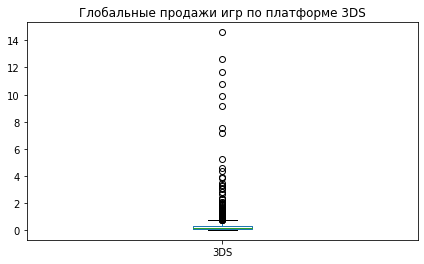

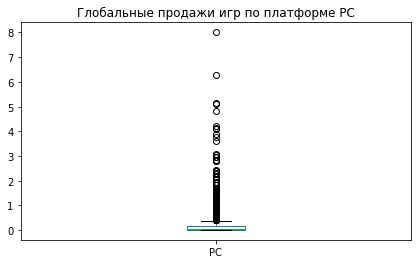

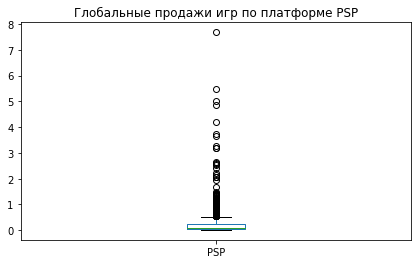

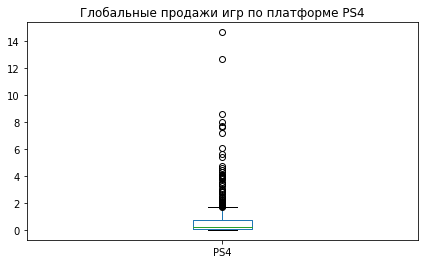

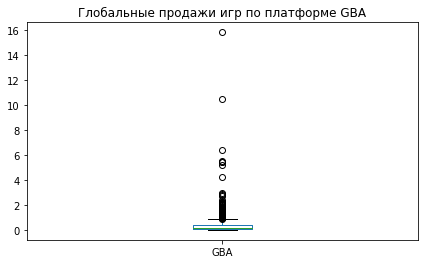

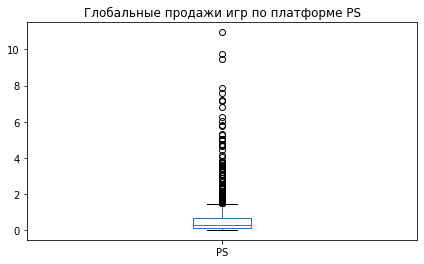

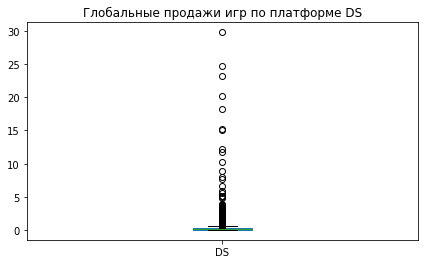

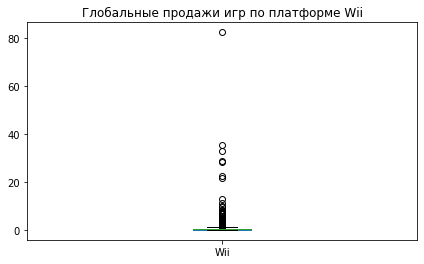

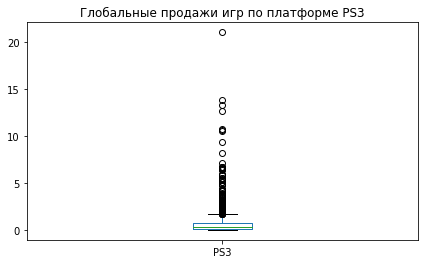

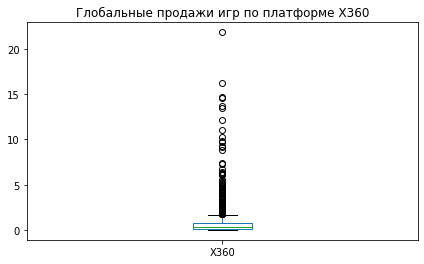

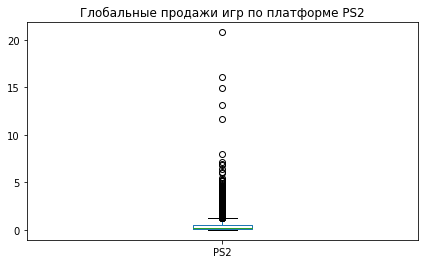

In [136]:
for platform in ['PSV', 'WiiU', '2600', 'XOne', 'GC', 'SNES', 'N64', 'NES', 'GB', 'XB', '3DS', 'PC', 'PSP',
 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']:
    t = df.query("platform == @platform")[['platform', 'sum_sales']]
    pd.DataFrame(np.array(t['sum_sales']), columns=[platform]).plot(
        kind='box', figsize=(7, 4), title=f'Глобальные продажи игр по платформе {platform}',
    )

- И если говорить о топовых продажах, то мы видим много т.н. выбросов, посомтрим на примере:
    - PC в качестве выбросов имеет 'The Sims 3' c 8.01 млн проданных копий по всему миру
    - PSP в качестве выбросов имеет 'Grand Theft Auto: Liberty City Stories' с 7.68 млн проданных копий по всему миру
    - Wii в качестве выбросов имеет 'Wii Sports' с 82.53 млн проданных копий по всему миру
- Таким образом мы можем говорить, что успех платформы определяют ее т.н. выбросы, так как для большинства игр у нас смещение ящика идет близко к нулю

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

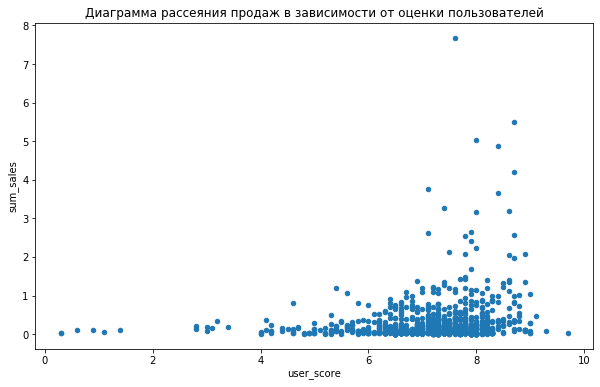

In [137]:
df.query("platform == 'PSP'")[['user_score', 'critic_score', 'sum_sales']]\
    .plot.scatter(
    x='user_score', y='sum_sales', title='Диаграмма рассеяния продаж в зависимости от оценки пользователей', figsize=(10, 6),
)
plt.show()

На графике рассеяния видно, что чем выше отзыв пользователей тем чаще случаются "большие продажи", при этом большинство игр остается близки к нулевым продажам

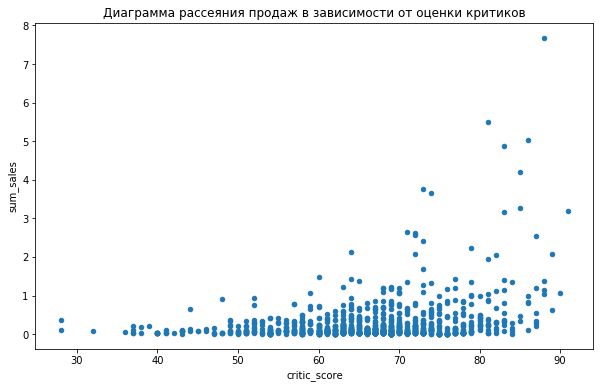

In [138]:
df.query("platform == 'PSP'")[['user_score', 'critic_score', 'sum_sales']]\
    .plot.scatter(
    x='critic_score', y='sum_sales', title='Диаграмма рассеяния продаж в зависимости от оценки критиков', figsize=(10, 6),
)
plt.show()

На графике рассеяния видно, что чем выше отзыв критиков тем чаще случаются "большие продажи", при этом большинство игр остается близки к нулевым продажам. В отличие от предыдущего графика видно, что тенденция к "отлипанию" от нуля выше при увеличении скора.

In [139]:
df.query("platform == 'PSP'")[['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.472797,0.178849
critic_score,0.472797,1.000000,0.281382
sum_sales,0.178849,0.281382,1.000000


Ну и применив .corr() мы уже сами видим, что корреляция слабая между чьим-то мнением и сумой продаж за игру, при этом для оценки критиков корреляция 0.281382, а для пользователей ниже - 0.178849.

### Соотнесите выводы с продажами игр на других платформах

In [140]:
df[['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.549143,0.111076
critic_score,0.549143,1.000000,0.280026
sum_sales,0.111076,0.280026,1.000000


На примере всех платформ, видно что critic_score почти также соотносится с sum_sales как и для платформы PSP - 0.28, а вот соотношение user_score даже уменьшилось до 0.11, что говорит о его реальном меньшем влиянии, или в данном случае его почти отсутствующем.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [141]:
df.groupby('genre')['sum_sales'].agg('sum').to_frame().reset_index().sort_values('sum_sales', ascending=False).head(5)

,genre,sum_sales
0,Action,1744.169997
10,Sports,1331.269998
8,Shooter,1052.450000
7,Role-Playing,934.560000
4,Platform,827.769998


Можно выделить ТОП-5 жанров по продажам: Action, Sports, Shooter, Role-Playing, Platform

In [142]:
genres = list(df.groupby('genre')['sum_sales'].agg('sum').to_frame().reset_index().sort_values('sum_sales', ascending=False)['genre'])
genres

['Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation',
 'Puzzle',
 'Adventure',
 'Strategy']

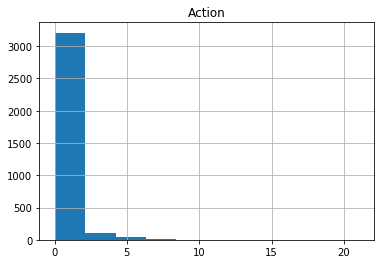

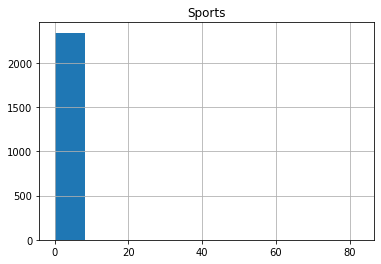

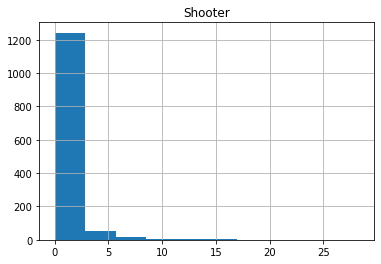

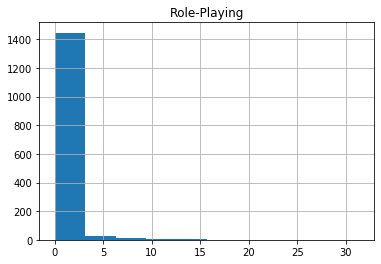

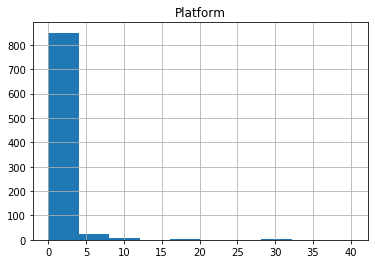

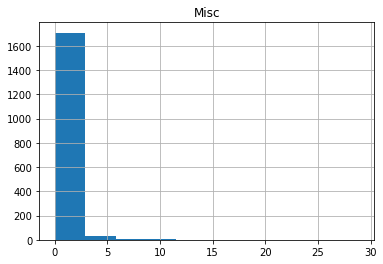

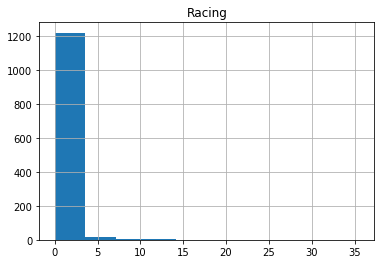

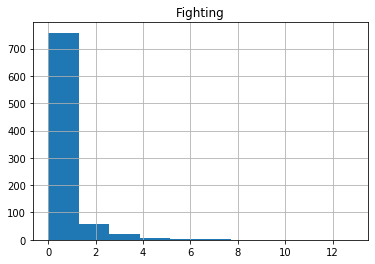

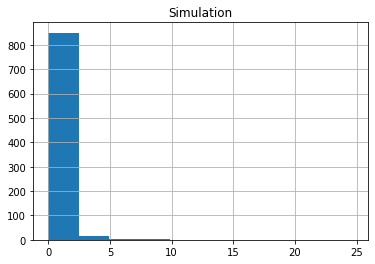

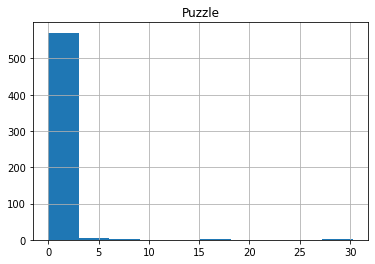

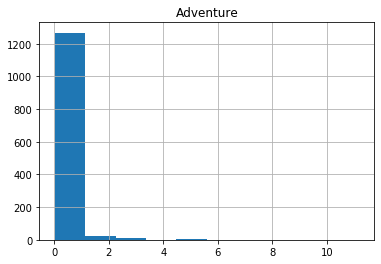

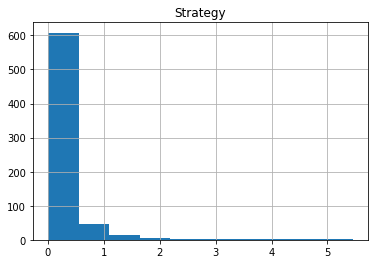

In [143]:
for g in genres:
    t = df.query("genre == @g")['sum_sales'].to_frame()
    t.columns = [g]
    t.hist()

Каждый жанр здесь идет в порядке убывания суммарной прибыли, по этому:
- Также как и бокс плоты здесь распределение показывает что наблюдений с выручкой близкой к 0 млн гораздо больше чем остальных, для Action это количество выше 3000, для Sports около 2250, при этом нет дорогих игр почти, а вот Shooter имеет несколько игр, которые по выручке принести до 17 млн.

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж. Самые популярные жанры (топ-5). Поясните разницу.

In [144]:
t1 = df.groupby('platform').agg('sum')[['na_sales']]\
    .reset_index().sort_values('na_sales', ascending=False).head()
t1['part'] = t1['na_sales'].apply(lambda x: x / sum(t1['na_sales']))
t1

,platform,na_sales,part
28,X360,602.469971,0.244996
16,PS2,583.840027,0.237420
26,Wii,496.899994,0.202066
17,PS3,393.489990,0.160014
4,DS,382.399994,0.155504


In [145]:
t2 = df.groupby('platform').agg('sum')[['eu_sales']]\
    .reset_index().sort_values('eu_sales', ascending=False).head()
t2['part'] = t2['eu_sales'].apply(lambda x: x / sum(t2['eu_sales']))
t2

,platform,eu_sales,part
16,PS2,339.290009,0.239585
17,PS3,330.290009,0.233229
28,X360,270.760010,0.191193
26,Wii,262.209991,0.185156
15,PS,213.610001,0.150837


In [ ]:
t3 = df.groupby('platform').agg('sum')[['jp_sales']]\
    .reset_index().sort_values('jp_sales', ascending=False).head()
t3['part'] = t3['jp_sales'].apply(lambda x: x / sum(t3['jp_sales']))
t3

По всем трем регионам видно, что доли не отличаются более чем на 50 процентов, например самая популярная платформа в eu PS2 суммарно принесла 339 млн, что из топ-5 является 24%, а минимальное в этом топе не ниже половины, здесь это 15%. Аналогично в других регионах видно что разрыв внутри топ-5 равномерный.

In [ ]:
t1 = df.groupby('genre').agg('sum')[['na_sales']]\
    .reset_index().sort_values('na_sales', ascending=False).head()
t1['part'] = t1['na_sales'].apply(lambda x: x / sum(t1['na_sales']))
t1

In [ ]:
t2 = df.groupby('genre').agg('sum')[['eu_sales']]\
    .reset_index().sort_values('eu_sales', ascending=False).head()
t2['part'] = t2['eu_sales'].apply(lambda x: x / sum(t2['eu_sales']))
t2

In [ ]:
t3 = df.groupby('genre').agg('sum')[['jp_sales']]\
    .reset_index().sort_values('jp_sales', ascending=False).head()
t3['part'] = t3['jp_sales'].apply(lambda x: x / sum(t3['jp_sales']))
t3

А вот по жанрам топ-5 в северной америке и европе полное совпадение, в отличае от японии, где 40% рынка захватили игры с жанром 'Role-Playing'.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
t = df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()
t

In [ ]:
df.groupby('rating')[['critic_score']].median().reset_index().sort_values('critic_score')

Если мы предположим что рейтинг влияет, тогда самый высокий рейтинг должен быть также самым прибыльным. AO - самый высокий рейтинг, но среди всех регионов это не самые высокие продажи AO	248.539993	97.050003	84.040001, а рейтинг RP	самый низкий, что должно было бы привести к низким продажам: RP	83.230003	38.349998	97.360001 и опять в каждой категории есть сумма выручки ниже.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC различаются

In [ ]:
pc_samples = list(df.query("platform == 'PC'")['user_score'])
xone_samples = list(df.query("platform == 'XOne'")['user_score'])

In [ ]:
def ttest_func(sample_1, sample_2, alpha=0.05):
    results = st.ttest_ind(sample_1, sample_1, equal_var=True)

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу') 

In [ ]:
ttest_func(pc_samples, xone_samples)

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются

In [ ]:
action_samples = list(df.query("genre == 'Action'")['user_score'])
sports_samples = list(df.query("genre == 'Sports'")['user_score'])

In [ ]:
ttest_func(action_samples, sports_samples)

## Вывод

- Данные об играх, и их данных были изучены, обнаружены пропуски и обработаны. Показаны описательные статистики
- Данные были подготовлены, столбцы оформлены в едином стиле, проверены дубликаты, создан столбец с суммарным количеством прожах по регионам
- Исследовали данные:
    - Выяснили, что в 2008 году выпускалось больше всего игр
    - Самыми прибыльными платформами  за время, указанное в датасете, были PS, PS2, DS, PS3, PS4
    - Учитывая что они все до PS4 держались в топе не менее 3 лет можно сделать предположение, что в 2017 году была в топе также PS4
    - Выяснили, что "срок жизни" для платформы которая была в топе по количеству игр - 7 лет, и около 12 лет в целом от старта до финиша
    - Посмотрели на ящик с усами и выяснили что топовые платформы и даже средние по продажам имею много выбросов, что на самом деле является их "хитами" продаж(на box plot это явно видно)
    - На графике рассеяния увидели, что мнение критиков коррелирует больше с общими продажами, чем мнение простых пользователей, впрочем оба числа не очень большие 0.286 и 0.11 соотв-но
    - Выяснили, что японский рынок не только отличается по топ-5 игр от европы и сев. америки, но и любимые жанры у них тоже свои
- Проверили гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - удалось подтвердить
    - Средние пользовательские рейтинги жанров Action и Sports одинаковые - удалось подтвердить